# NB Classifier on the MNist Dataset

This is the Jupyter Notebook demonstrating applying the NB Classifier created by Christopher Simmons & David Nguyen.

In [10]:
"""
    Here we can see how the MNist data is loaded and used to train/test the NB classifier.

    On Chris' machine it takes an average of 2.5s to train the classifier and approx 5 to 7 minutes to predict against the testing data.
"""

import numpy as np
from nb_classifier import NBClassifier

X_train = np.load("MNIST_data/MNIST_X_train.npy")
y_train = np.load("MNIST_data/MNIST_y_train.npy")

X_test = np .load("MNIST_data/MNIST_X_test.npy")
y_test = np.load("MNIST_data/MNIST_y_test.npy")

X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

X_categorical = np.full((784,), False)

nb = NBClassifier(smoothing_flag=True)
nb.fit(X_train, X_categorical, y_train)

y_pred = nb.predict(X_test)

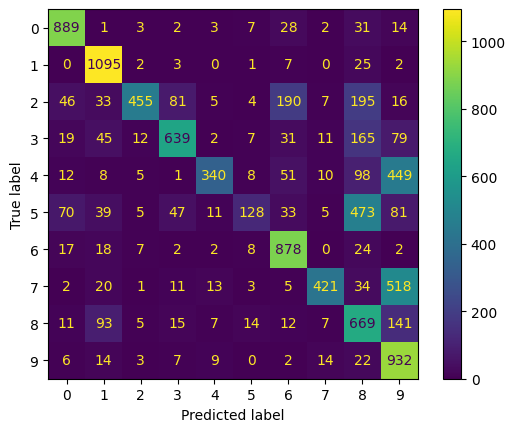

In [11]:
"""
    This code block is used to generate the confusion matrix and heatmaps for each digit. 
"""

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Above we can observe the confusion matrix for the accuracy of the classifier on the dataset. The diagonal of this matrix represents True positives. We can observe that classifier is mostly accurate, yet has some cases where it may struggle to correctly classify the number.

Below is the code and associated heatmaps for each digit:

In [6]:
"""
    Code to generate the heatmaps
"""

mu_values = []
for label in nb.classes:
        mu_labels = np.zeros((784, ))

        for pixel_index in range(784):
            mu = nb.feature_info[pixel_index][label][0]
            mu_labels[pixel_index] = mu

        mu_labels = np.reshape(mu_labels, (28, 28))
        mu_values.append(mu_labels)  

for label, mu_labels in enumerate(mu_values):
    plt.figure(figsize=(6, 6))
    plt.imshow(mu_labels, interpolation='nearest')
    plt.savefig(f"heatmap_class_{label}.png")
    plt.show()

AttributeError: 'NBClassifier' object has no attribute 'feature_info'